In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from activ.pipeline import score_clusters
import matplotlib.pyplot as plt
import scipy
from matplotlib.backends.backend_pdf import PdfPages
import h5py
from scipy.stats import entropy
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as _sch
from collections import Counter
from activ import load_data
from sklearn.decomposition import PCA

In [88]:
data = load_data()
nmfdata = load_data(uoinmf=True)

In [89]:
oc = data.outcomes
bm = data.biomarkers
oc_nmf = nmfdata.outcome_bases
oc_features = data.outcome_features

In [90]:
pca = PCA(n_components=6)
pca.fit(oc)
oc_pca = pca.components_
oc_pca.shape

(6, 177)

Text(0,0.5,'PCA Leverage Score')

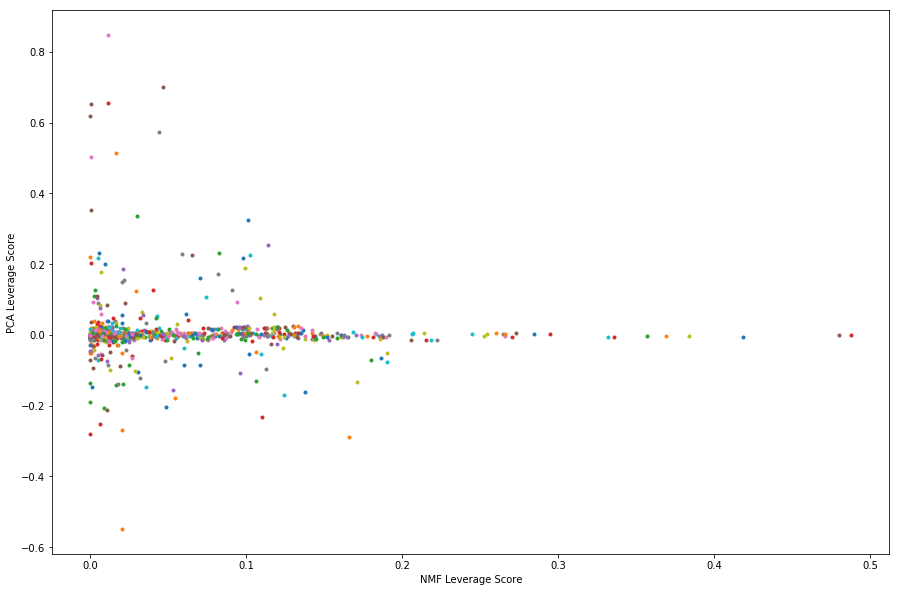

In [91]:
plt.figure(figsize=(15,10))
plt.plot(oc_nmf, oc_pca, '.')
plt.xlabel('NMF Leverage Score')
plt.ylabel('PCA Leverage Score')

In [92]:
def rank_features(data):
    values = sorted(data.sum(axis=0))[::-1]
    return values

In [93]:
pca_values = rank_features(oc_pca)
nmf_values = rank_features(oc_nmf)
len(pca_values), len(nmf_values)

(177, 177)

Text(0,0.5,'PCA Leverage Score')

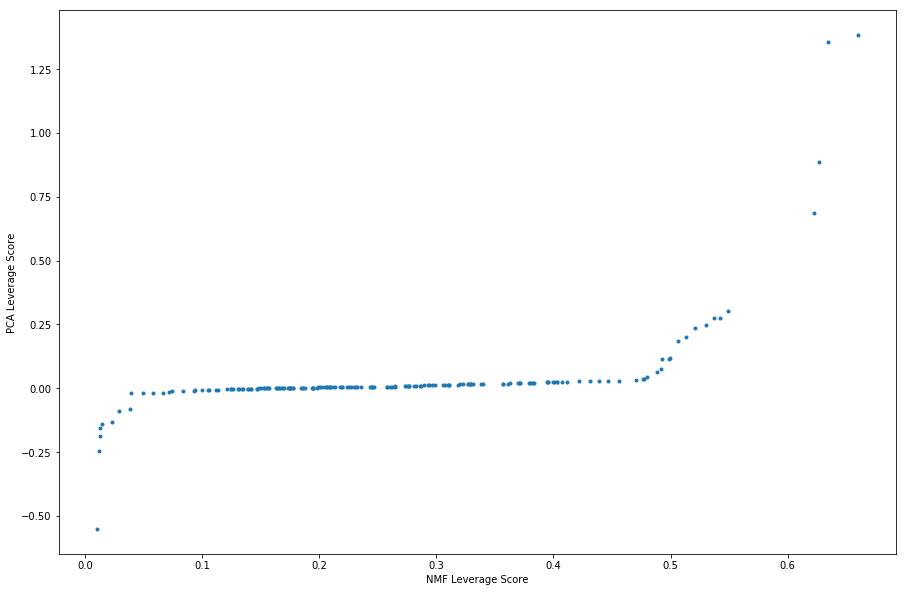

In [94]:
plt.figure(figsize=(15,10))
plt.plot(nmf_values, pca_values, '.')
plt.xlabel('NMF Leverage Score')
plt.ylabel('PCA Leverage Score')